In [126]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':40,
         'ytick.labelsize': 40}
plt.rcParams.update(params)


sns.set(style='darkgrid')
sns.set_palette(sns.color_palette("Blues"))


### Inspecting the data

In [127]:
df = pd.read_csv("./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

In [128]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [129]:
rows_wo_reviews = df[df['reviews.text'].isnull() == True]

In [130]:
len(rows_wo_reviews)

0

In [131]:
print(f'total number of reviews: {df.shape[0]}')

total number of reviews: 28332


In [132]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [133]:
list(set(df['primaryCategories'].tolist()))


['Home & Garden',
 'Electronics',
 'Electronics,Furniture',
 'Health & Beauty',
 'Toys & Games,Electronics',
 'Office Supplies,Electronics',
 'Office Supplies',
 'Electronics,Media',
 'Animals & Pet Supplies']

In [134]:
df['reviews.title'].head()

0    ... 3 of them and one of the item is bad quali...
1    ... always the less expensive way to go for pr...
2    ... are not Duracell but for the price i am ha...
3    ... as well as name brand batteries at a much ...
4    ... batteries are very long lasting the price ...
Name: reviews.title, dtype: object

In [135]:
print(df['reviews.numHelpful'].isnull().sum(), df['reviews.doRecommend'].isnull().sum())

12217 12246


In [136]:
#number of reviews for each product
df[['name', 'reviews.text']].groupby('name').agg('count')

,reviews.text
name,
"All-New Fire 7 Tablet with Alexa, 7"" Display, 8 GB - Marine Blue",82
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case",233
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case",293
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",883
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers",160
...,...
Kindle PowerFast International Charging Kit (for accelerated charging in over 200 countries),5
"Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Free 3G + Wi-Fi - Includes Special Offers",36
"Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers",505


In [137]:
# do the analysis for one of the products
df = df[df['name']
        == 'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers']  

In [138]:
df.shape

(883, 24)

/home/atefehmorsali/anaconda3/envs/nlp/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '5'),
  Text(1, 0, '4'),
  Text(2, 0, '3'),
  Text(3, 0, '2'),
  Text(4, 0, '1')])

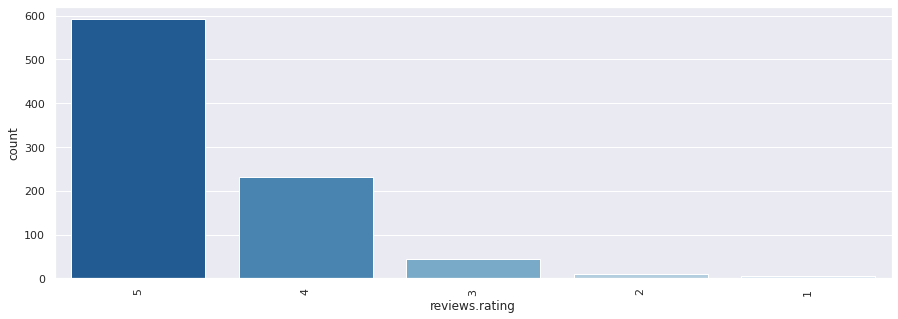

In [139]:
#inspect to see the overal customer ratings for this particular product
from collections import Counter
sns.countplot(df['reviews.rating'], order=[x for x, count in sorted(Counter(df['reviews.rating']).items(), key=lambda x: -x[1])], palette="Blues_r")
plt.xticks(rotation=90)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/atefehmorsali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


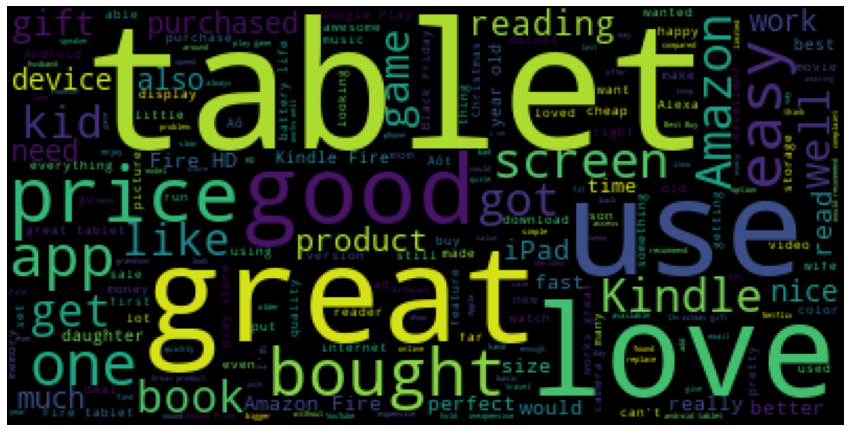

In [140]:
# visualize the most frequent words used in customer reviews using Word cloud 
import nltk
from nltk.corpus import stopwords

%matplotlib inline
import matplotlib as plt
from wordcloud import WordCloud, STOPWORDS

nltk.download('stopwords')
stopWords = stopwords.words('english')

plt.rcParams['figure.figsize'] = (15, 10)


reviews = df['reviews.text'].tolist()
Text = ' '.join(reviews)


word_cloud = WordCloud(stopwords=stopWords).generate(Text)  
plt.pyplot.imshow(word_cloud)
plt.pyplot.axis('off')
plt.pyplot.savefig('reviewsWordCloud.jpg')
plt.pyplot.show()



### Text Processing and Data Preparation

start with a basic Natural Language Pre-processing

- Extract English Words
- Lemmatize text to exclude repeated words with same root
- Stem words to avoid over counting same meaning words
- Remove stop words

In [141]:
import string
import re

from nltk.stem import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [142]:
df.shape

(883, 24)

In [143]:
#keep reviews with # of characters > 20
df = df[df['reviews.text'].apply(lambda x: len(x.split()) > 20)]

In [144]:
def process_text(raw_text):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_text) 
    words = letters_only.lower().split()
    
    stops = set(stopwords.words("english")) 
    not_stop_words = [w for w in words if not w in stops]
    
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in not_stop_words]
    
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in lemmatized]
    
    return( " ".join( stemmed ))

In [145]:
df['clean_reviews'] = df['reviews.text'].apply(lambda x: process_text(x))

In [146]:
df['clean_titles'] = df['reviews.title'].apply(lambda x: process_text(x))

In [151]:
df.loc[:, ['reviews.text', 'clean_reviews']].head()

,reviews.text,clean_reviews
19407,This is a great tablet. I got it on Black Frid...,great tablet got black friday amaz price downs...
19408,My daughter said she really like her table. Sh...,daughter said realli like tabl homework school...
19410,This was purchased to give as a Christmas gift...,purchas give christma gift ipad cours realli i...
19415,The fire fits perfect into my hand. It is easy...,fire fit perfect hand easi navig thru us got h...
19416,After having and using a couple 'cheaper' gene...,use coupl cheaper gener android tablet price s...


In [152]:
df.loc[:, ['reviews.title', 'clean_titles']].head()

,reviews.title,clean_titles
19407,A great tablet for beginners and Amazon fans,great tablet beginn amazon fan
19408,A great tablet for my daughter.,great tablet daughter
19410,A lot of entertainment for the money,lot entertain money
19415,A Perfect Fit,perfect fit
19416,A+,


In [153]:
titles = df['clean_titles'].tolist()
reviews = df['clean_reviews'].tolist()

In [154]:
# append title to its review if not already in the review
for i in range(len(titles)):
    reviews[i] = reviews[i]+ ' ' + titles[i] if titles[i] not in reviews[i] else reviews[i]

In [155]:
reviews[1]

'daughter said realli like tabl homework school work also thing great tablet daughter'